# Нейроинформатика. Лабораторная работа 2
### Линейная нейронная сеть. Правило обучения Уидроу-Хоффа

Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

Выполнил Лисин Роман, М8О-406Б-20

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Функции сигналов и параметры:

In [2]:
def in1(t):
    return np.sin(t * t - 15 * t + 3) - np.sin(t) * np.sin(t)

def in2(t):
    return np.cos(t * t)

def out(t):
    return np.cos(t * t + 2 * np.pi) / 2

h1 = 0.01
h2 = 0.02

range1 = (0.5, 3)
range2 = (0, 4)

### Задание 1
Попробуем предсказать следующий элемент последовательности

Сгенерируем датасет для обучения

In [3]:
t1 = np.linspace(range1[0], range1[1], int((range1[1] - range1[0]) / h1))
x1 = in1(t1)

In [4]:
def gen_dataset(x, delay=5):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = x[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [5]:
x_train1, y_train1 = gen_dataset(x1)
x_train1.shape, y_train1.shape

((245, 5), (245,))

Убедимся, что датасеты сгенерились правильно

In [6]:
x_train1[:3], y_train1[:3]

(array([[0.66514051, 0.71027607, 0.73658461, 0.74346538, 0.73070012],
        [0.71027607, 0.73658461, 0.74346538, 0.73070012, 0.69845359],
        [0.73658461, 0.74346538, 0.73070012, 0.69845359, 0.64726658]]),
 array([0.69845359, 0.64726658, 0.57804171]))

Все корректно, можем приступать к обучению перцептрона

In [7]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1))

In [8]:
model1.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [9]:
train_info1 = model1.fit(x_train1, y_train1, batch_size=1, epochs=50)

Epoch 1/50
245/245 [==============================] - 1s 1ms/step - loss: 3.8405 - root_mean_squared_error: 1.9597
Epoch 2/50
245/245 [==============================] - 0s 1ms/step - loss: 1.5399 - root_mean_squared_error: 1.2409
Epoch 3/50
245/245 [==============================] - 0s 993us/step - loss: 0.5419 - root_mean_squared_error: 0.7362
Epoch 4/50
245/245 [==============================] - 0s 1ms/step - loss: 0.1872 - root_mean_squared_error: 0.4327
Epoch 5/50
245/245 [==============================] - 0s 978us/step - loss: 0.0854 - root_mean_squared_error: 0.2922
Epoch 6/50
245/245 [==============================] - 0s 982us/step - loss: 0.0565 - root_mean_squared_error: 0.2376
Epoch 7/50
245/245 [==============================] - 0s 997us/step - loss: 0.0440 - root_mean_squared_error: 0.2098
Epoch 8/50
245/245 [==============================] - 0s 950us/step - loss: 0.0356 - root_mean_squared_error: 0.1887
Epoch 9/50
245/245 [==============================] - 0s 990us/step - 

In [10]:
model1.layers[0].get_weights()

[array([[-0.76960367],
        [-0.49731734],
        [ 1.2077867 ],
        [ 1.1024797 ],
        [-0.11325198]], dtype=float32),
 array([-0.03841008], dtype=float32)]

Посмотрим на графики лосса и RMSE

In [11]:
def plot_metrics(train_info):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    loss_history = train_info.history['loss']
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    loss_history = train_info.history['root_mean_squared_error']
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('RMSE')

    plt.show()

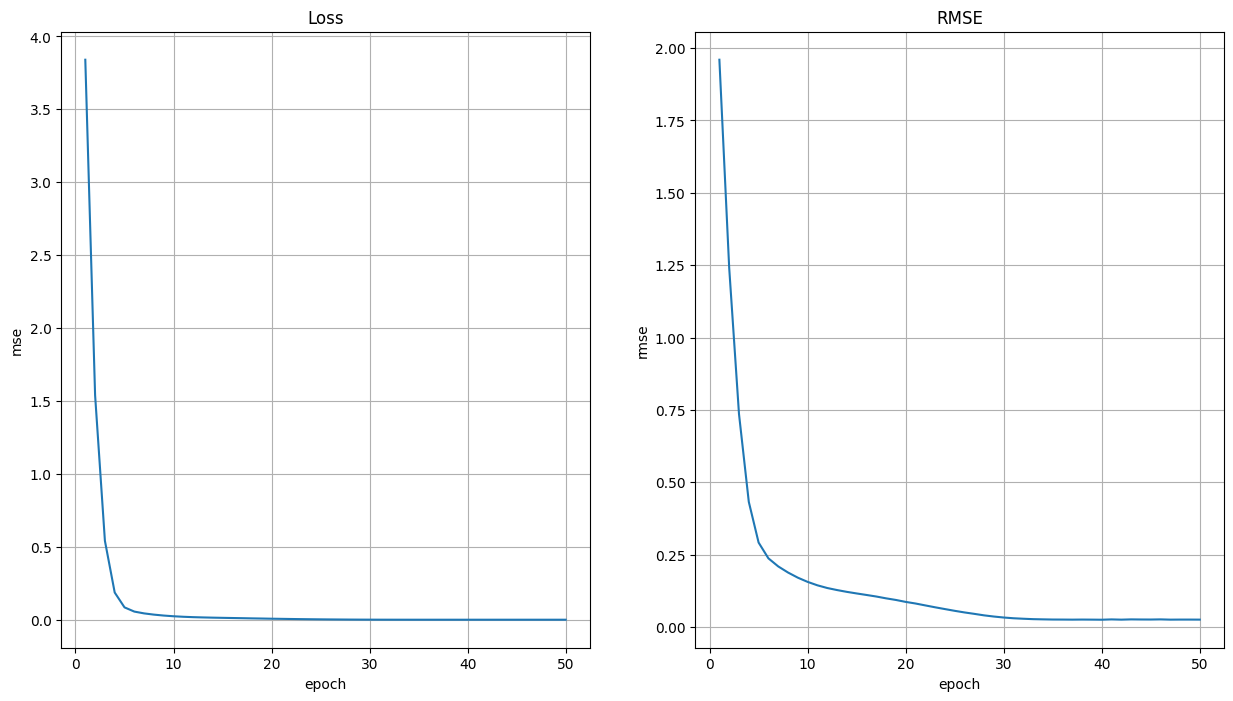

In [12]:
plot_metrics(train_info1)

Посмотрим на результат работы модели

8/8 [==============================] - 0s 2ms/step


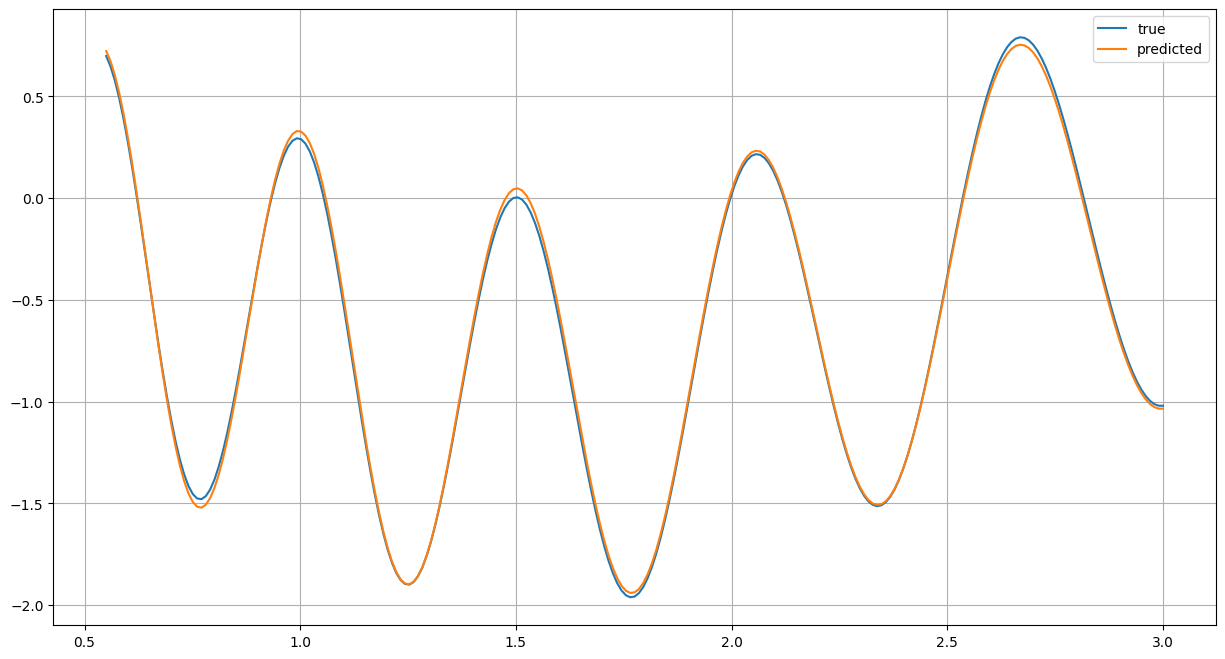

In [13]:
plt.figure(figsize=(15, 8))

plt.plot(t1[5:], x1[5:], label='true')
plt.plot(t1[5:], model1.predict(x_train1), label='predicted')
plt.legend()
plt.grid()
plt.show()

Модель довольно неплохо научилась предсказывать следующую точку

### Задание 2
Попробуем сделать многошаговый прогноз

Сначала обучим модель с задержкой = 3

In [14]:
x_train2, y_train2 = gen_dataset(x1, delay=3)
x_train2.shape, y_train2.shape

((247, 3), (247,))

In [15]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(1))

In [16]:
model2.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [17]:
train_info2 = model2.fit(x_train2, y_train2, batch_size=1, epochs=100)

Epoch 1/100
247/247 [==============================] - 1s 1ms/step - loss: 0.2856 - root_mean_squared_error: 0.5344
Epoch 2/100
247/247 [==============================] - 0s 990us/step - loss: 0.0963 - root_mean_squared_error: 0.3102
Epoch 3/100
247/247 [==============================] - 0s 961us/step - loss: 0.0738 - root_mean_squared_error: 0.2717
Epoch 4/100
247/247 [==============================] - 0s 1ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657
Epoch 5/100
247/247 [==============================] - 0s 987us/step - loss: 0.0681 - root_mean_squared_error: 0.2610
Epoch 6/100
247/247 [==============================] - 0s 990us/step - loss: 0.0667 - root_mean_squared_error: 0.2583
Epoch 7/100
247/247 [==============================] - 0s 943us/step - loss: 0.0649 - root_mean_squared_error: 0.2548
Epoch 8/100
247/247 [==============================] - 0s 967us/step - loss: 0.0636 - root_mean_squared_error: 0.2522
Epoch 9/100
247/247 [==============================] - 0s 98

In [18]:
model2.layers[0].get_weights()

[array([[-1.1373785 ],
        [ 1.2760266 ],
        [ 0.83491665]], dtype=float32),
 array([-0.01236548], dtype=float32)]

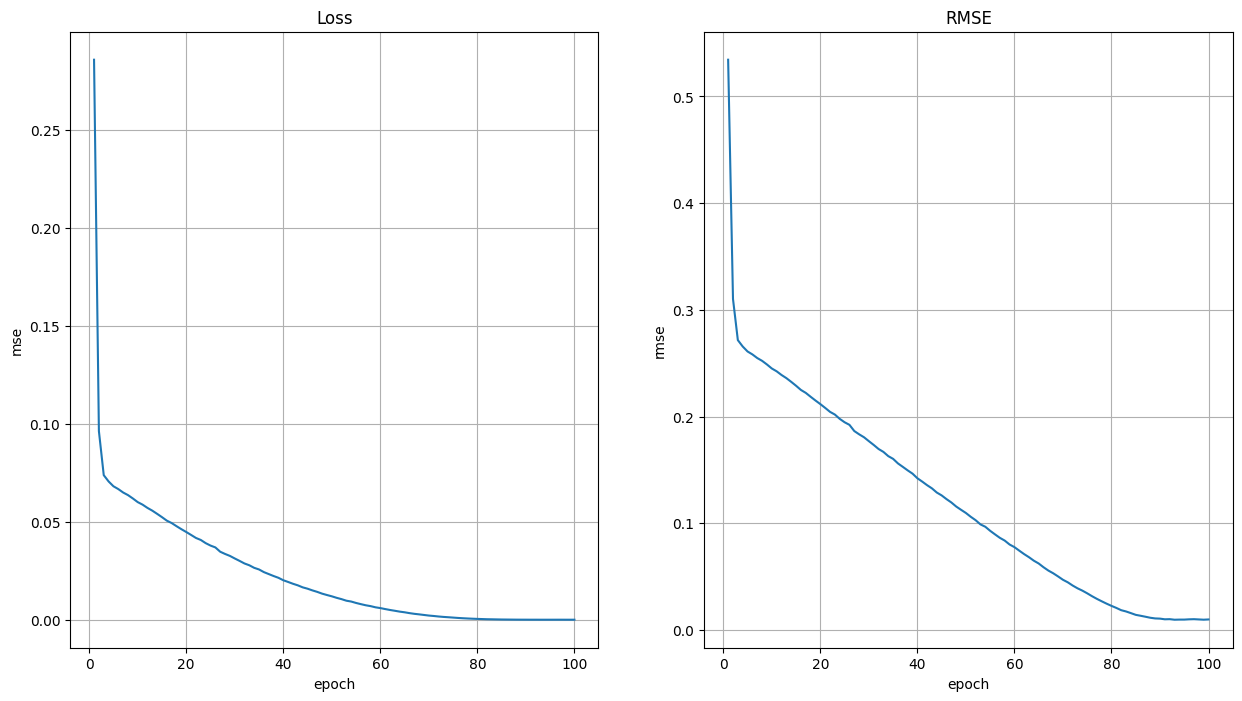

In [19]:
plot_metrics(train_info2)

Теперь сделаем прогноз на 10 шагов вперед

In [20]:
t_test = np.linspace(range1[1], range1[1] + 10 * h1, 10)
x_test = in1(t_test)

x_pred = x_train2[-1]
for i in range(10):
    x_pred = np.append(x_pred, model2.predict(np.expand_dims(x_pred[-3:], axis=0)))

1/1 [==============================] - 0s 16ms/step


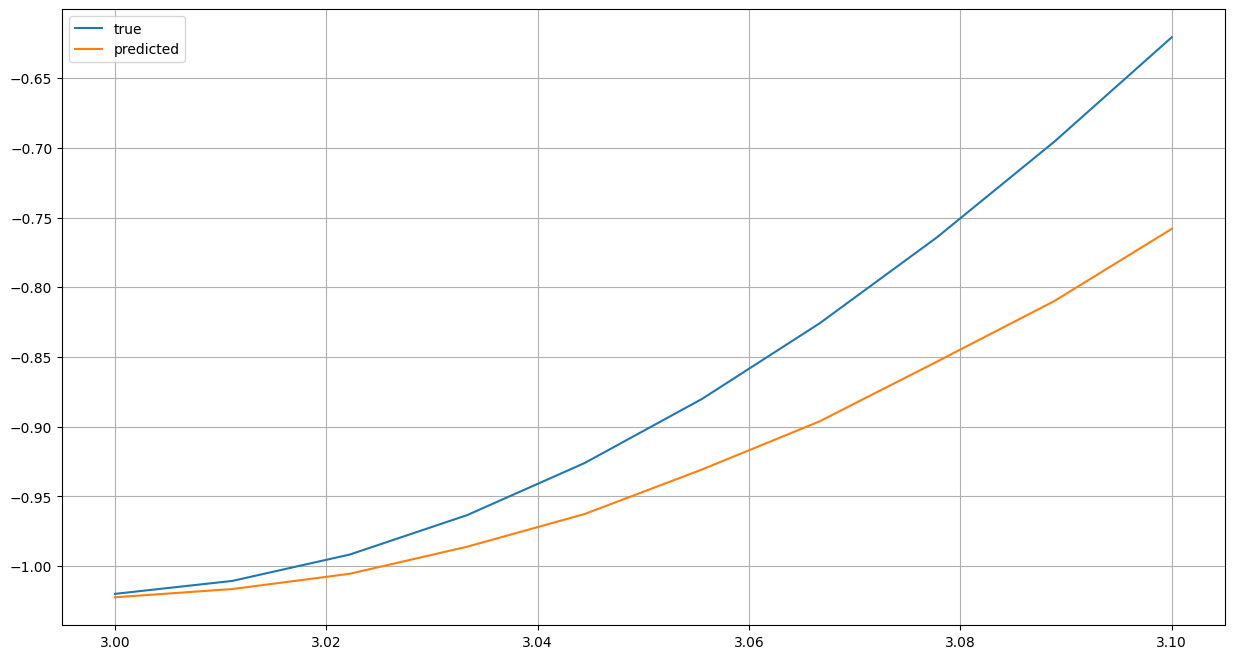

In [21]:
plt.figure(figsize=(15, 8))

plt.plot(t_test, x_test, label='true')
plt.plot(t_test, x_pred[3:], label='predicted')
plt.legend()
plt.grid()
plt.show()

Здесь модель уже справилась похуже. На несколько шагов вперед она смотрит плохо

### Задание 3
Попробуем обучить адаптивный линейный фильтр

In [22]:
t3 = np.linspace(range2[0], range2[1], int((range2[1] - range2[0]) / h2))
x3 = in2(t3)
y3 = out(t3)

In [23]:
def gen_dataset_filter(x, y, delay=5):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = y[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [24]:
x_train3, y_train3 = gen_dataset_filter(x3, y3)
x_train3.shape, y_train3.shape

((195, 5), (195,))

Обучаем модель

In [25]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(1))

In [27]:
model3.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [28]:
train_info3 = model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
195/195 [==============================] - 0s 919us/step - loss: 0.0049 - root_mean_squared_error: 0.0699
Epoch 2/50
195/195 [==============================] - 0s 924us/step - loss: 0.0015 - root_mean_squared_error: 0.0384
Epoch 3/50
195/195 [==============================] - 0s 943us/step - loss: 0.0011 - root_mean_squared_error: 0.0334
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 8.5888e-04 - root_mean_squared_error: 0.0293
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 6.8774e-04 - root_mean_squared_error: 0.0262
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 6.0835e-04 - root_mean_squared_error: 0.0247
Epoch 7/50
195/195 [==============================] - 0s 934us/step - loss: 5.3744e-04 - root_mean_squared_error: 0.0232
Epoch 8/50
195/195 [==============================] - 0s 960us/step - loss: 4.7857e-04 - root_mean_squared_error: 0.0219
Epoch 9/50
195/195 [==============================

In [29]:
model3.layers[0].get_weights()

[array([[-0.6930382 ],
        [ 0.15167661],
        [ 0.62448573],
        [ 0.50529087],
        [-0.12660067]], dtype=float32),
 array([0.00452936], dtype=float32)]

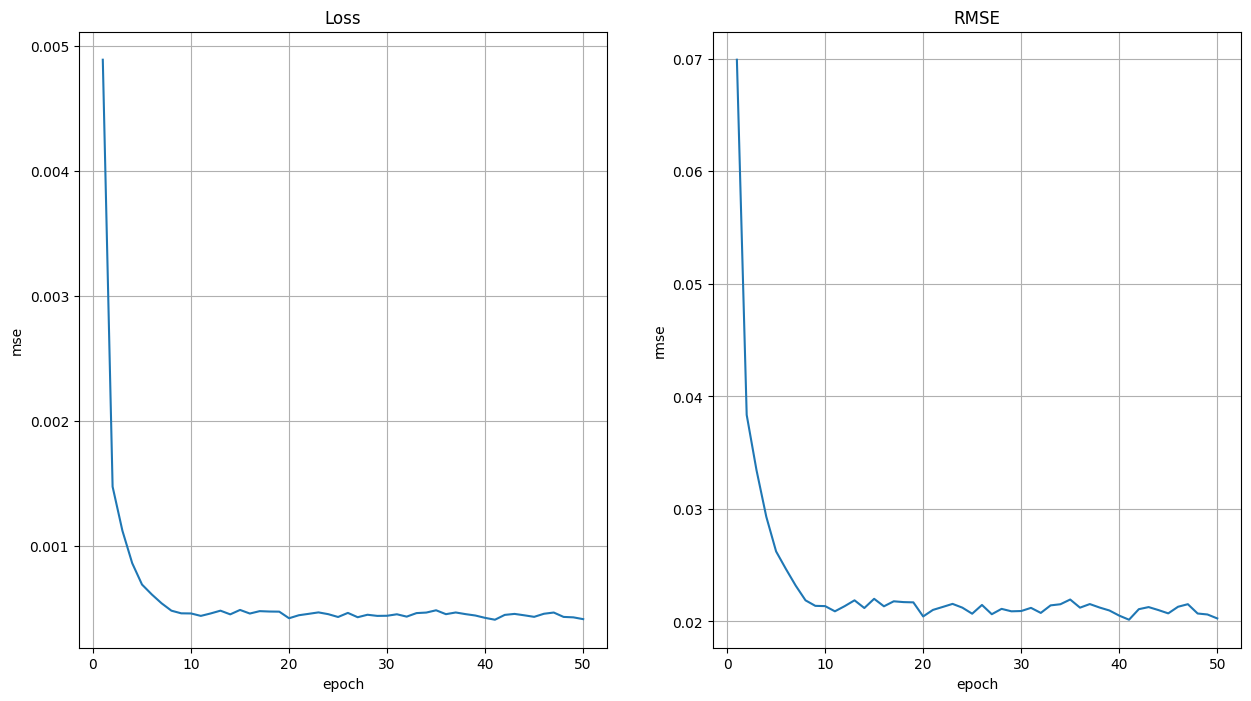

In [30]:
plot_metrics(train_info3)

Посмотрим на результат модели

7/7 [==============================] - 0s 1ms/step


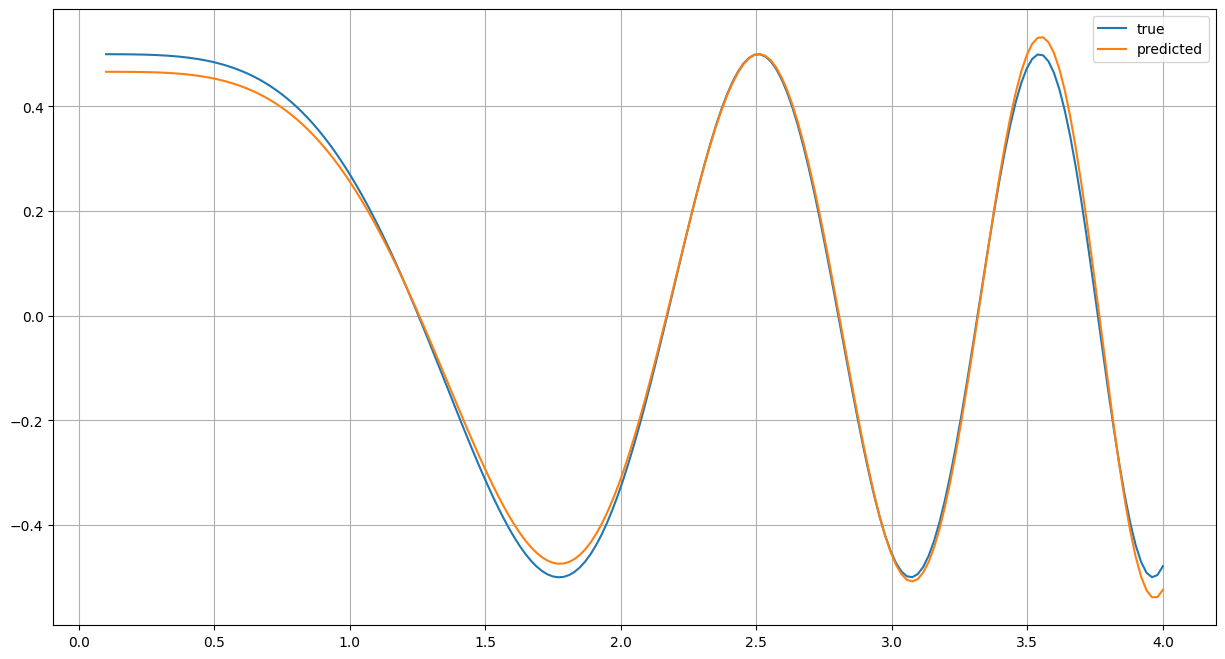

In [31]:
plt.figure(figsize=(15, 8))

plt.plot(t3[5:], out(t3[5:]), label='true')
plt.plot(t3[5:], model3.predict(x_train3), label='predicted')
plt.legend()
plt.grid()
plt.show()

Модель хорошо справилась с предсказанием значения выходного сигнала

# Вывод

В данной работе я снова потренировался в обучении перцептронов. В этот раз я учил модель предсказывать следующее значение последовательности. Выяснил, что перцептрон хорошо учится предсказывать вперед на 1 шаг, но предсказывать на 10 шагов вперед получается плохо (из-за накапливаемой ошибки).

Также я попробовал реализовать свой адаптивный линейный фильтр. Результаты получились хорошие - перцептрон достаточно точно предсказывает значение выходного сигнала.